In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

In [26]:
# np.random.seed(42)
# tf.keras.utils.set_random_seed(42)
tf.keras.backend.clear_session()

In [ ]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     print("GPU is available:", gpus)
# else:
#     print("No GPU found.")

No GPU found.


In [ ]:
# print(f"TensorFlow Version: {tf.__version__}")
# print(f"Built with CUDA: {tf.test.is_built_with_cuda()}")
# print(f"Available GPUs: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.19.0
Built with CUDA: False
Available GPUs: []


In [ ]:
# physical_devices = tf.config.list_physical_devices('GPU')
# for device in physical_devices:
#     tf.config.experimental.set_memory_growth(device, True)

In [16]:
(train_ds, test_ds), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,  
    with_info=True       
)

In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(28, 28, 1)
()


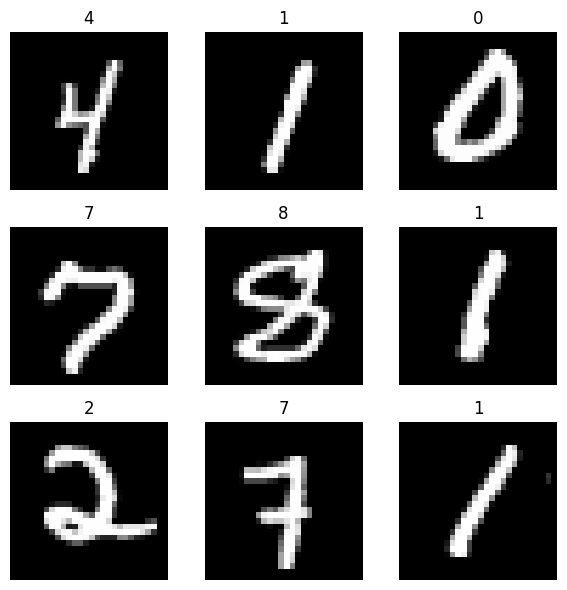

In [18]:
plt.figure(figsize=(6, 6))
for i, (image, label) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy(), cmap='gray')
    plt.title(f'{label.numpy()}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

test_ds = test_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(32)
test_ds = test_ds.cache()
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [20]:

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(train_ds, epochs=15, validation_data=test_ds)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8315 - loss: 0.5513 - val_accuracy: 0.9639 - val_loss: 0.1254
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9625 - loss: 0.1234 - val_accuracy: 0.9707 - val_loss: 0.0976
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9744 - loss: 0.0848 - val_accuracy: 0.9711 - val_loss: 0.0966
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9801 - loss: 0.0653 - val_accuracy: 0.9705 - val_loss: 0.0993
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9843 - loss: 0.0513 - val_accuracy: 0.9742 - val_loss: 0.0932
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9863 - loss: 0.0428 - val_accuracy: 0.9768 - val_loss: 0.0822
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0366 - val_accuracy: 0.9754 - val_loss: 0.0933
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0322 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


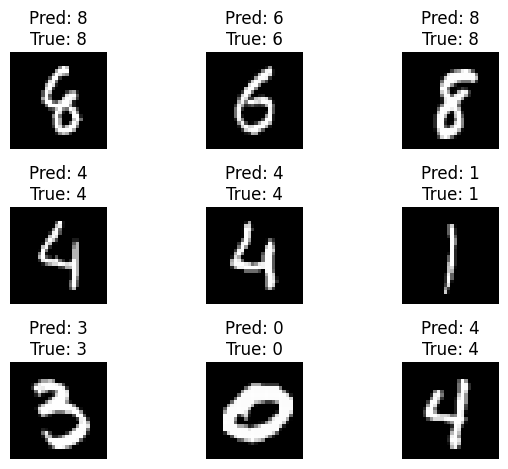

In [23]:
for image, label in test_ds.shuffle(10000).take(1):
    predictions = model.predict(image)
    predicted_labels = tf.argmax(predictions, axis=1)

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().squeeze(), cmap="gray")
        plt.title(f"Pred: {predicted_labels[i].numpy()}\nTrue: {label[i].numpy()}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [25]:
# Get a batch from test_ds
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    pred_labels = tf.argmax(preds, axis=1)
    wrong_indices = np.where(pred_labels.numpy() != labels.numpy())[0]
    print(f"Number of wrong predictions in this batch: {len(wrong_indices)}")

    plt.figure(figsize=(10, 10))
    for idx, wrong_idx in enumerate(wrong_indices[:9]):  # Show up to 9 wrong predictions
        plt.subplot(3, 3, idx + 1)
        plt.imshow(images[wrong_idx].numpy().squeeze(), cmap='gray')
        plt.title(f"Pred: {pred_labels[wrong_idx].numpy()}\nTrue: {labels[wrong_idx].numpy()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Number of wrong predictions in this batch: 0


<Figure size 1000x1000 with 0 Axes>